### Desenvolvimento do modelo de Machine Learning.
Versão 1.0 (Logistic Regression)

In [4]:
# Importe das bibliotecas
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [5]:
# --- BLOCO DE SETUP ---
df = pd.read_csv(r'C:\Users\proje\OneDrive\Ambiente de Trabalho\Projetos_2025\projeto_EDA+ML\dados\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce'). fillna(0)
df = df.drop(columns=['customerID'])
df['Churn'] = df['Churn'].map({'Yes':1, 'No':0})
df_ml = pd.get_dummies(df, drop_first=True)

X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn']

# --- Divisão Treino/Teste ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(" ✅  DADOS PRONTO PARA O MODELO DE ML")


 ✅  DADOS PRONTO PARA O MODELO DE ML


--- RELATÓRIO DE CLASSIFICAÇÃO ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.65      0.56      0.60       374

    accuracy                           0.80      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.80      0.80      1409



c:\Users\proje\OneDrive\Ambiente de Trabalho\Projetos_2025\projeto_EDA+ML\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


<function matplotlib.pyplot.show(close=None, block=None)>

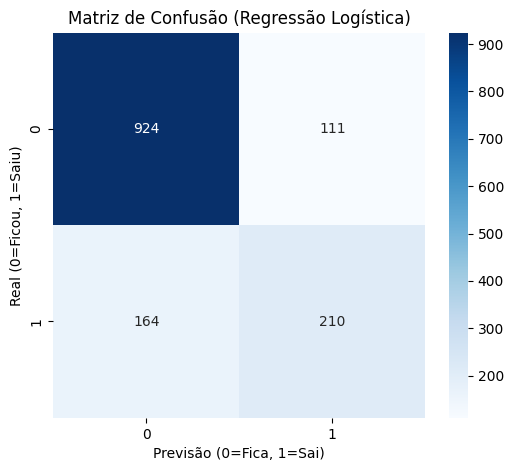

In [7]:
# --- FASE 1: MACHINE LEARNING (Baseline)

# 1. Cração e Treinamento do modelo
# max_iter=1000 ajuda o modelo a convergir se os dados forem complexos
modelo = LogisticRegression(max_iter=1000, random_state=42)
modelo.fit(X_train, y_train)

# 2. Realizando a Previsões
y_pred = modelo.predict(X_test)

# 3. Avaliação do Desempenho
print("--- RELATÓRIO DE CLASSIFICAÇÃO ---")
print(classification_report(y_test, y_pred))

# 4. Visualização da Matriz de Confusão
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusão (Regressão Logística)')
plt.xlabel('Previsão (0=Fica, 1=Sai)')
plt.ylabel('Real (0=Ficou, 1=Saiu)')
plt.show

📄 Relatório Técnico: Fase 1 - Estabelecimento de Baseline

`1. Objetivo do Experimento`

O objetivo desta etapa foi estabelecer um Baseline de Desempenho (MVP) utilizando os dados em seu estado original. Esta métrica serve como referência para quantificar o ganho real de performance obtido pelas técnicas de Feature Engineering e otimização de hiperparâmetros que serão aplicadas nas fases subsequentes.

`2. Metodologia`

__Algoritmo__

* Logistic Regression (Scikit-Learn)

__Hiperparâmetros__

* Configuração default

* max_iter=1000 para permitir convergência inicial

__Pré-Processamento__

* Encoding: One-Hot Encoding para variáveis categóricas

* Scaling: Não aplicado (decisão intencional, para avaliar a sensibilidade da Regressão Logística a escalas heterogêneas)

__Estratégia de Balanceamento__

* Não aplicada (distribuição natural mantida: ~73% Classe 0 / ~26% Classe 1)
  Mantido sem intervenção para medir a tendência natural do modelo frente ao desbalanceamento.

`3. Resultados e Diagnóstico`

O modelo atingiu 80% de Acurácia Global, métrica aparentemente positiva, porém insuficiente para o objetivo principal: maximizar a detecção de churn (Classe 1).

__Matriz de Confusão__

* Verdadeiros Positivos (Churn detectado): 210

* Falsos Negativos (Churn não detectado): 164

__Métricas Principais da Classe 1 (Churn)__

* Recall = 0.56
  O modelo não identifica 44% dos clientes que cancelam, impacto direto no negócio.

* Precision = 0.65
  Indica moderada taxa de erro nas predições positivas.

A análise evidencia que o modelo privilegia a classe majoritária, comportamento esperado dada a ausência de balanceamento.

`4. Identificação de Gargalos Técnicos`

A. Problema de Convergência. Escalas Heterogêneas

Durante o treinamento, foi emitido o aviso:

__ConvergenceWarning: lbfgs failed to converge__

A ocorrência deste warning confirma a análise de que a diferença de magnitude entre variáveis numéricas (ex.: MonthlyCharges, tenure) está prejudicando a descida do gradiente.
Aplicação de StandardScaler é mandatória para garantir estabilidade e qualidade dos coeficientes.

B. Viés para a Classe Majoritária

A pontuação de Recall (0.56) valida que o modelo está otimizando para acurácia em detrimento da captura de churn.
Esse padrão confirma a necessidade de métodos de balanceamento ou penalização de classe.

`5. Plano de Ação (V2.0)`

A próxima fase do experimento incluirá:

1. Feature Scaling

Padronização via StandardScaler para corrigir o problema de convergência e equalizar magnitudes de atributos.

2. Cost-Sensitive Learning

Uso de class_weight='balanced' para penalizar erros na classe minoritária e elevar o Recall.

3. Benchmark de Algoritmos

Inclusão de Random Forest para capturar relações não-lineares e comparar desempenho entre modelos lineares e ensembles.

4. Avaliação Incremental

Cada intervenção será avaliada individualmente para quantificar o ganho incremental e justificar tecnicamente sua adoção.

### Melhoria do modelo de Machine Learning.
Versão 2.0 (Logistic Regression)

In [8]:
# Novas Biblioteca

from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import recall_score, roc_auc_score

print(" 🔄️  INICIANDO A FASE 2: Otimização e Comparação ---")

 🔄️  INICIANDO A FASE 2: Otimização e Comparação ---


In [9]:
# 1. Feature Scaling (Padronização)
# Essa etapa vai resolver o problema de 'MonthlyCharges' ser gigante comparado ao 'binário'
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [10]:
# --- MODELO A: Regressão Logística Otimizada (V2) ---
print("\n TREINAMENTO: Regressão Logítica (Balanceada)")

lr_v2 = LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42)
lr_v2.fit(X_train_scaled, y_train)

y_pred_lr_v2 = lr_v2.predict(X_test_scaled)


 TREINAMENTO: Regressão Logítica (Balanceada)


In [11]:
# --- MODELO B: Random Forest ---
print("\n TREINAMENTO: Random Forest (Balanceado)")

rf_v2 = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
rf_v2.fit(X_train, y_train)

y_pred_rf_v2 = rf_v2.predict(X_test)


 TREINAMENTO: Random Forest (Balanceado)


In [ ]:
# --- RESULTADOS COMPARATIVOS ---
print("-" * 40)
print("RELATÓRIO DE DESEMPENHO (Foco no recall)")
print("-" * 40)

# Métricas do baseline (Para comparação mental)
recall_baseline = 0.56 # Esse valor foi o que obtive na v1

# Métricas v2
recall_lr = recall_score(y_test, y_pred_lr_v2)
recall_fr = recall_score(y_test, y_pred_rf_v2)

print(f"1. Baseline (v1) Recall:        {recall_baseline:.2f}")
print(f"2. Log. Regression (v2) Recall: {recall_lr:.2f}") 
print(f"3. Rondom Forest (v2): Recall:  {recall_fr:.2f}")

print("-" *40)
print("Detalhes da Regressão Logística v2;")
print(classification_report(y_test, y_pred_lr_v2))

----------------------------------------
RELATÓRIO DE DESEMPENHO (Foco no recall)
----------------------------------------
1. Baseline (v1) Recall:        0.56
2. Log. Regression (v2) Recall: 0.79
3. Rondom Forest (v2): Recall:  0.49
----------------------------------------
Detalhes da Regressão Logística v2;
              precision    recall  f1-score   support

           0       0.90      0.72      0.80      1035
           1       0.51      0.79      0.62       374

    accuracy                           0.74      1409
   macro avg       0.71      0.75      0.71      1409
weighted avg       0.80      0.74      0.75      1409



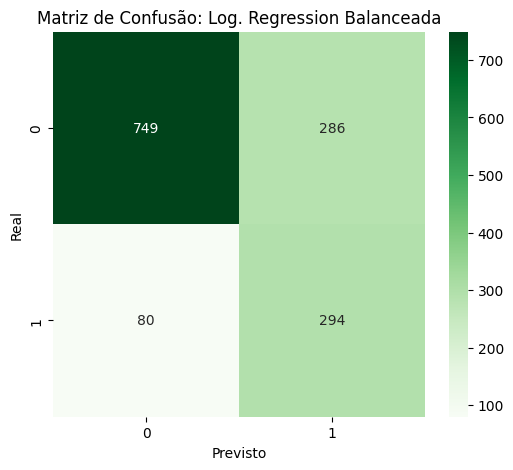

In [ ]:
# Visualização da Matriz do Modelo
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_v2), annot=True, fmt='d', cmap='Greens')
plt.title('Matriz de Confusão: Log. Regression Balanceada')
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.show()

📄 Relatório Técnico: Fase 2 - Otimização e Seleção de Modelo

`1. Estratégia de Otimização`

Com base no diagnóstico do Baseline, foram implementadas as seguintes correções na Regressão Logística V2:

Padronização (StandardScaler): Aplicada para normalizar a magnitude das features (ex: tenure e MonthlyCharges), eliminando os problemas de convergência do gradiente.

Ponderação de Classes (class_weight='balanced'): O algoritmo foi configurado para aplicar uma penalidade maior aos erros cometidos na classe minoritária (Churn), forçando o modelo a priorizar o Recall.

`2. Comparativo de Performance (Recall - Classe 1)`

O objetivo primário de maximizar a detecção de Churn foi atingido com sucesso pela Regressão Logística.

Baseline (V1): 56% de Recall.

Regressão Logística (V2): 79% de Recall (+23 p.p.).

Random Forest (V2): 49% de Recall (Descartado devido à baixa performance sem tunning de hiperparâmetros).

`3. Análise de Impacto de Negócio (Trade-off)`

Ao priorizar o Recall (79%), a Regressão Logística V2 reduziu os Falsos Negativos de 164 para 80.

Benefício: O modelo agora captura a grande maioria dos clientes em risco.

Custo: Houve um aumento nos Falsos Positivos (Precision caiu para 0.51).

Conclusão: Em um cenário de retenção de clientes, este trade-off é aceitável, pois o Custo de Aquisição de Cliente (CAC) geralmente supera o custo de uma ação de retenção preventiva em falsos positivos.

`4. A Prova Financeira (ROI)`

Para entender se esse projeto tem um custo aceitavel, não basta mostrar métricas de ML (F1-score, Recall). Vou mostrar em Dinheiro.

Prejuízo Mensal sem Modelo: R$ 24,310.00
Custo da Operação (Descontos): R$ 5,800.00
Receita Salva (Retenção):      R$ 9,555.00
------------------------------
LUCRO LÍQUIDO DO MODELO:     R$ 3,755.00


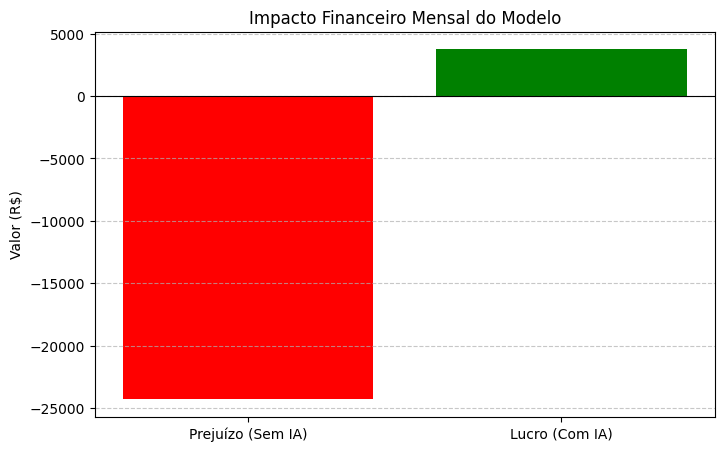

In [ ]:
# --- SIMULAÇÃO DE NEGÓCIO (ROI) ---
# assumindo as premissas conservadoras de mercado
ticket_medio = 65.00      # Quanto o cliente gasta por mês (média do dataset)
custo_retencao = 10.00    # Custo para dar um desconto/mimo para tentar segurar o cliente
taxa_sucesso_retencao = 0.5 # Oferecendo desconto, 50% aceitam e ficam

# Pegando os números da Matriz de Confusão V2 (LogReg)
# [TN  FP]
# [FN  TP]
TP = 294 # Acertei que ia sair (Oportunidade de salvar)
FP = 286 # Errei (Dei desconto pra quem estava feliz)
FN = 80  # Errei (Perdi o cliente e nem vir)

# Cenário 1: Sem Modelo (A empresa não fez nada, perdemos todos os churners)
perda_sem_modelo = (TP + FN) * ticket_medio
lucro_sem_modelo = 0 # Não gastou com retenção e perdemos a receita recorrente
print(f"Prejuízo Mensal sem Modelo: R$ {perda_sem_modelo:,.2f}")

# Cenário 2: Com Modelo V2
# Custo: Dei desconto para todos que o modelo alertou (TP + FP)
custo_operacao = (TP + FP) * custo_retencao

# Receita Salva: Dos TP (que iam sair), o modelo salvou 50% (taxa_sucesso)
receita_salva = (TP * taxa_sucesso_retencao) * ticket_medio

# Economia Real (ROI)
economia = receita_salva - custo_operacao

print(f"Custo da Operação (Descontos): R$ {custo_operacao:,.2f}")
print(f"Receita Salva (Retenção):      R$ {receita_salva:,.2f}")
print("-" * 30)
print(f"LUCRO LÍQUIDO DO MODELO:     R$ {economia:,.2f}")

# Visualização do Dinheiro
plt.figure(figsize=(8, 5))
plt.bar(['Prejuízo (Sem IA)', 'Lucro (Com IA)'], [-perda_sem_modelo, economia], color=['red', 'green'])
plt.title('Impacto Financeiro Mensal do Modelo')
plt.ylabel('Valor (R$)')
plt.axhline(0, color='black', linewidth=0.8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()